In [4]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import decomposition
from matplotlib.backends.backend_pdf import PdfPages
import importlib
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

sys.path.append('../catrace/')
import catrace
from catrace import dataio
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr
import catrace.pattern_correlation as pcr
import catrace.manifold_embed as emb
import catrace.exp_collection as ecl
import catrace.cluster as catclust
from catrace.frame_time import convert_sec_to_frame
from catrace.trace_dataframe import concatenate_planes
importlib.reload(catrace.plot_trace)
importlib.reload(ecl)
importlib.reload(ptt)
import catrace.frame_time as frame_time


In [5]:
importlib.reload(ecl)
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive')]
region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/'
dfovf_dict = dict()
load_data = False
if load_data:
    for region in region_list:
        dfovf_dict[region] = dict()
        for exp in exp_list:
            exp_name = exp[0]
            print(exp_name, region)
            dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir, exp_name, region)

In [13]:
csplus_dict = dict()
for exp in exp_list:
    if exp[1] not in csplus_dict.keys():
        csplus_dict[exp[1]] = []
    csplus_dict[exp[1]].append(exp[0])
csplus_dict

{'phe-arg': ['2021-02-05-DpOBEM-JH9',
  '2021-03-18-DpOBEM-JH10',
  '2021-03-19-DpOBEM-JH10',
  '2021-04-02-DpOBEM-JH11',
  '2021-04-03-DpOBEM-JH11',
  '2021-05-01-DpOBEM-JH13',
  '2021-05-22-DpOBEM-JH14',
  '2021-09-15-DpOBEM-JH20',
  '2021-09-17-DpOBEM-JH20',
  '2021-09-18-DpOBEM-JH20'],
 'naive': ['2021-07-15-DpOBEM-N2',
  '2021-07-16-DpOBEM-N3',
  '2021-12-10-DpOBEM-N4',
  '2021-12-31-DpOBEM-N7'],
 'arg-phe': ['2021-07-30-DpOBEM-JH17',
  '2021-07-31-DpOBEM-JH17',
  '2021-09-02-DpOBEM-JH18',
  '2021-09-03-DpOBEM-JH18',
  '2021-09-04-DpOBEM-JH18',
  '2021-09-29-DpOBEM-JH21',
  '2021-10-01-DpOBEM-JH21',
  '2021-10-02-DpOBEM-JH21'],
 'phe-trp': ['2021-11-10-DpOBEM-JH23',
  '2021-11-14-DpOBEM-JH23',
  '2021-11-24-DpOBEM-JH24',
  '2021-11-27-DpOBEM-JH24',
  '2021-11-26-DpOBEM-JH24']}

In [14]:
importlib.reload(ecl)
select_neuron_explist = ecl.get_data_dict_decorator(exp_list, region_list, dfovf_dict, ptt.select_neuron)
thresh = 5.5
dfovf_select_dict = select_neuron_explist(thresh)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp
2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 OB
2021-07-16-DpOBEM-N3 OB
2021-07-30-DpOBEM-JH17 OB
2021-07-31-DpOBEM-JH17 OB
2021-09-02-DpOBEM-JH18 OB


In [15]:
#pp = dfovf_select_dict[region]['2021-12-10-DpOBEM-N4']
#pp.stack(level='time').unstack(level=['odor','trial']).unstack(level='time')

In [16]:
region = 'Dp'
plist = dfovf_select_dict[region].values() #[p for p in dfovf_select_dict[region].values()]
all_dfovf_select = pd.concat(plist, keys=dfovf_select_dict[region].keys(), names=['fish_id'])
list(all_dfovf_select.columns)

all_dfovf_select.to_pickle('../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))
all_dfovf_select

time                                                 0         1         2    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     0      -0.087107 -0.081762  0.120060   
                                        1       0.026763 -0.120955 -0.217178   
                                        2      -0.207659 -0.092794 -0.109698   
                                        3      -0.072826 -0.144551 -0.238825   
                                        5       0.300471 -0.109048  0.189066   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     202    -0.194579 -0.138189  0.204675   
                                        205     0.252245  0.277498  0.405024   
                                        210    -0.352745 -0.161851 -0.035756   
                                        218     0.331698  0.024583 -0.372552   
                                        221    -0.169432  0.281335  0.173620   

time                                                 3         4         5    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     0      -0.175427 -0.118987 -0.116887   
                                        1       0.113037  0.196108  0.195177   
                                        2       0.130574 -0.328046 -0.503845   
                                        3      -0.442386 -0.412755 -0.397014   
                                        5      -0.014164  0.029926  0.016210   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     202    -0.026473 -0.020292 -0.166309   
                                        205     0.042897  0.305541  0.055604   
                                        210     0.315852 -0.148051  0.199265   
                                        218    -0.022476 -0.082870 -0.303983   
                                        221    -0.147374 -0.161281 -0.255425   

time                                                 6         7         8    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     0       0.090842 -0.017838 -0.071818   
                                        1       0.072438 -0.218604 -0.193099   
                                        2      -0.381784 -0.304898 -0.098164   
                                        3      -0.312698  0.154490 -0.221702   
                                        5       0.510365 -0.046312  0.065659   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     202     0.188187 -0.345081 -0.067564   
                                        205    -0.032507 -0.063264  0.119317   
                                        210     0.278920  0.221742  0.178913   
                                        218    -0.400622  0.200725 -0.583836   
                                        221     0.074348 -0.018677  0.079140   

time                                                 9    ...       155  \
fish_id               odor  trial plane neuron            ...             
2021-02-05-DpOBEM-JH9 phe   0     0     0       0.087089  ...  0.021412   
                                        1      -0.066215  ... -0.042388   
                                        2      -0.081483  ... -0.167331   
                                        3       0.155312  ... -0.178115   
                                        5      -0.147255  ...  0.334821   
...                                                  ...  ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     202     0.480099  ... -0.154182   
                                        205    -0.135177  ... -0.205433   
                                        210    -0.129411  ...  0.112335   
                                        218    -0.28

In [6]:
region = 'OB'
all_dfovf_select = pd.read_pickle('../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))

In [3]:
importlib.reload(ptt)
if region =='OB':
    time_window = [6,11]
else:
    time_window = [6,7]   
frame_rate = 30/4
all_response = ptt.mean_pattern_in_time_window(all_dfovf_select, time_window, frame_rate)
all_response.to_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
plane                           0                                           
neuron                        4         7         10        11        15    
odor  trial                                                                 
phe   0                  1.133029 -0.167069  0.565534  0.588648  1.190561   
      1                  1.681059  0.036786  1.229577  0.853786  0.968576   
      2                  1.049215 -0.123949  0.545868  0.847025  1.026042   
trp   0                  1.606831  0.148675  0.076449  1.080625  1.082505   
      1                  1.466890  0.222176  0.304556  1.699689  0.894340   
      2                  1.640066 -0.068627  0.135331  0.974607  0.822166   
arg   0                  0.196282 -0.010623  0.615272  0.780066  0.478502   
      1                  0.897039 -0.006988  0.555032  1.036244  0.633248   
      2                  0.768735 -0.068221  0.313823  0.681453  0.515638   
tdca  0                  1.581403 -0.019864  0.266599  0.643278  0.351070   
      1                  1.380155 -0.072076  0.197653  0.720399  0.364150   
      2                  0.793455 -0.203555  0.360984  0.765113  0.432882   
tca   0                  1.842937 -0.050952  0.454671  1.126183  0.609691   
      1                  1.963380  0.001450  0.352673  1.101114  0.257599   
      2                  1.773702 -0.045911  0.362229  1.197336  0.388098   
gca   0                  1.071540 -0.031217  0.074527  0.833244  0.448582   
      1                  1.566890  0.013968  0.186975  0.869420  0.577106   
      2                  1.316350 -0.146092  0.228047  1.051026  0.478420   
acsf  0                  0.125510 -0.166380  0.034947  0.878986  0.208621   
      1                  0.166362 -0.009934  0.096047  0.532156  0.310700   
      2                  0.539706 -0.082361  0.176927  0.798546  0.355107   
spont 0                 -0.080328 -0.054622 -0.024922 -0.039581  0.036745   
      1                 -0.231897  0.017351 -0.064003 -0.024237 -0.079913   
      2                  0.079220  0.114066  0.108815  0.008195  0.085511   

fish_id                                                        ...  \
plane                                                          ...   
neuron            16        17        27        28        30   ...   
odor  trial                                                    ...   
phe   0      0.629909  0.876280  3.336184  1.180823  0.911935  ...   
      1      1.006872  1.166149  4.078517  1.752680  1.232570  ...   
      2      1.258056  0.744669  3.635768  1.430675  0.849590  ...   
trp   0      0.201510  0.289671  0.818986  0.328244  1.518389  ...   
      1      0.163310  0.489046  0.190008  0.221526  1.607958  ...   
      2      0.263685  0.464695  0.448345  0.349866  1.608979  ...   
arg   0      0.293736  1.858443  0.237798  0.417494  0.170002  ...   
      1      0.279661  2.548009  0.252045  0.468365  0.718502  ...   
      2      0.336357  2.196748  0.167540  0.394952  0.312440  ...   
tdca  0      1.378422  1.408027  0.226069  0.402715  0.493459  ...   
      1      1.003935  1.281842  0.255158  0.496576  0.746237  ...   
      2      0.925416  1.151663  0.920777  0.567939  0.419713  ...   
tca   0      0.335344  0.528895 -0.020917  0.401711  0.848830  ...   
      1      0.619048  0.824600  0.204702  0.739655  0.626846  ...   
      2      0.534280  0.653535  0.414496  0.391473  0.772208  ...   
gca   0      1.893462  1.159473  2.886934  0.204900  0.800705  ...   
      1      2.411617  1.300077  3.037931  0.096043  0.921853  ...   
      2      1.768228  0.579602  2.461593  0.163784  0.541090  ...   
acsf  0      0.246093 -0.112573  0.080028  0.093461  0.113313  ...   
      1      0.050271  0.098530  0.072871  0.075284  0.156219  ...   
      2      0.268215  0.178487  0.154330  0.174739  0.114407  ...   
spont 0      0.045699  0.026507  0.035642  0.094019  0.095962  ...   
      1      0.023513 -

In [7]:
region = 'OB'
all_response = pd.read_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

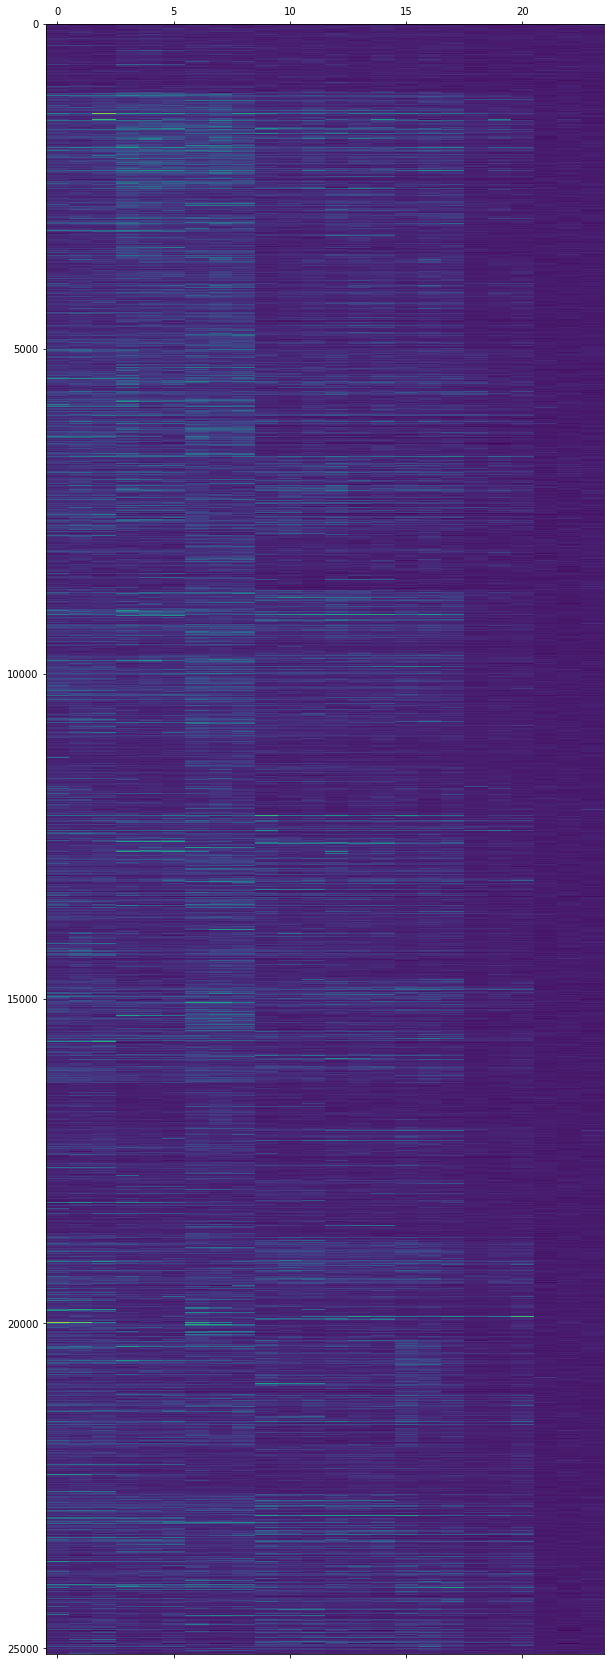

In [5]:
fig, ax = plt.subplots(figsize=(10,30))
ax.matshow(all_response.transpose(), aspect='auto')

In [4]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
H = all_response.to_numpy()
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(H.transpose())
# kmeans = AffinityPropagation().fit(H.transpose())
# kmeans = SpectralClustering(n_clusters=10,assign_labels='discretize',random_state=0).fit(H.transpose())

In [3]:
def plot_clustered_heatmap(all_response, kmeans, exclude_cluster_id=[]):
    fig = plt.figure(figsize=(20, 30))
    gs = fig.add_gridspec(1, 2,  width_ratios=(9, 2), wspace=0.02)
    ax = fig.add_subplot(gs[0, 0])
    ax_cid = fig.add_subplot(gs[0, 1], sharey=ax)
    
    Xc = all_response.append(pd.DataFrame(kmeans.labels_.reshape(1,-1), columns=all_response.columns))
    Xc = Xc.transpose().rename(columns={0:'cluster_id'})
    Xcs = Xc.sort_values('cluster_id')
    
    
    if len(exclude_cluster_id):
        Xcs = Xcs[~Xcs['cluster_id'].isin(exclude_cluster_id)]

    response_heatmap = ax.matshow(Xcs.iloc[:, :-1], aspect='auto')

    ori_cmap = matplotlib.cm.get_cmap('tab20b')
    cnorm = matplotlib.colors.Normalize(vmin=0, vmax=n_clusters-1)
    cmap = matplotlib.colors.ListedColormap([ori_cmap(cnorm(i)) for i in range(n_clusters)])
    
    cluster_id_map = ax_cid.matshow(np.tile(Xcs.cluster_id, (2,1)).transpose(),
                                    aspect='auto', cmap=cmap)
    # plt.colorbar(mappable=cluster_id_map)

    labels, counts = np.unique(Xcs.cluster_id, return_counts=True)
    dummy = [ax_cid.text(0, ct, l, fontsize='xx-large') for ct, l in zip(np.cumsum(counts), labels)]

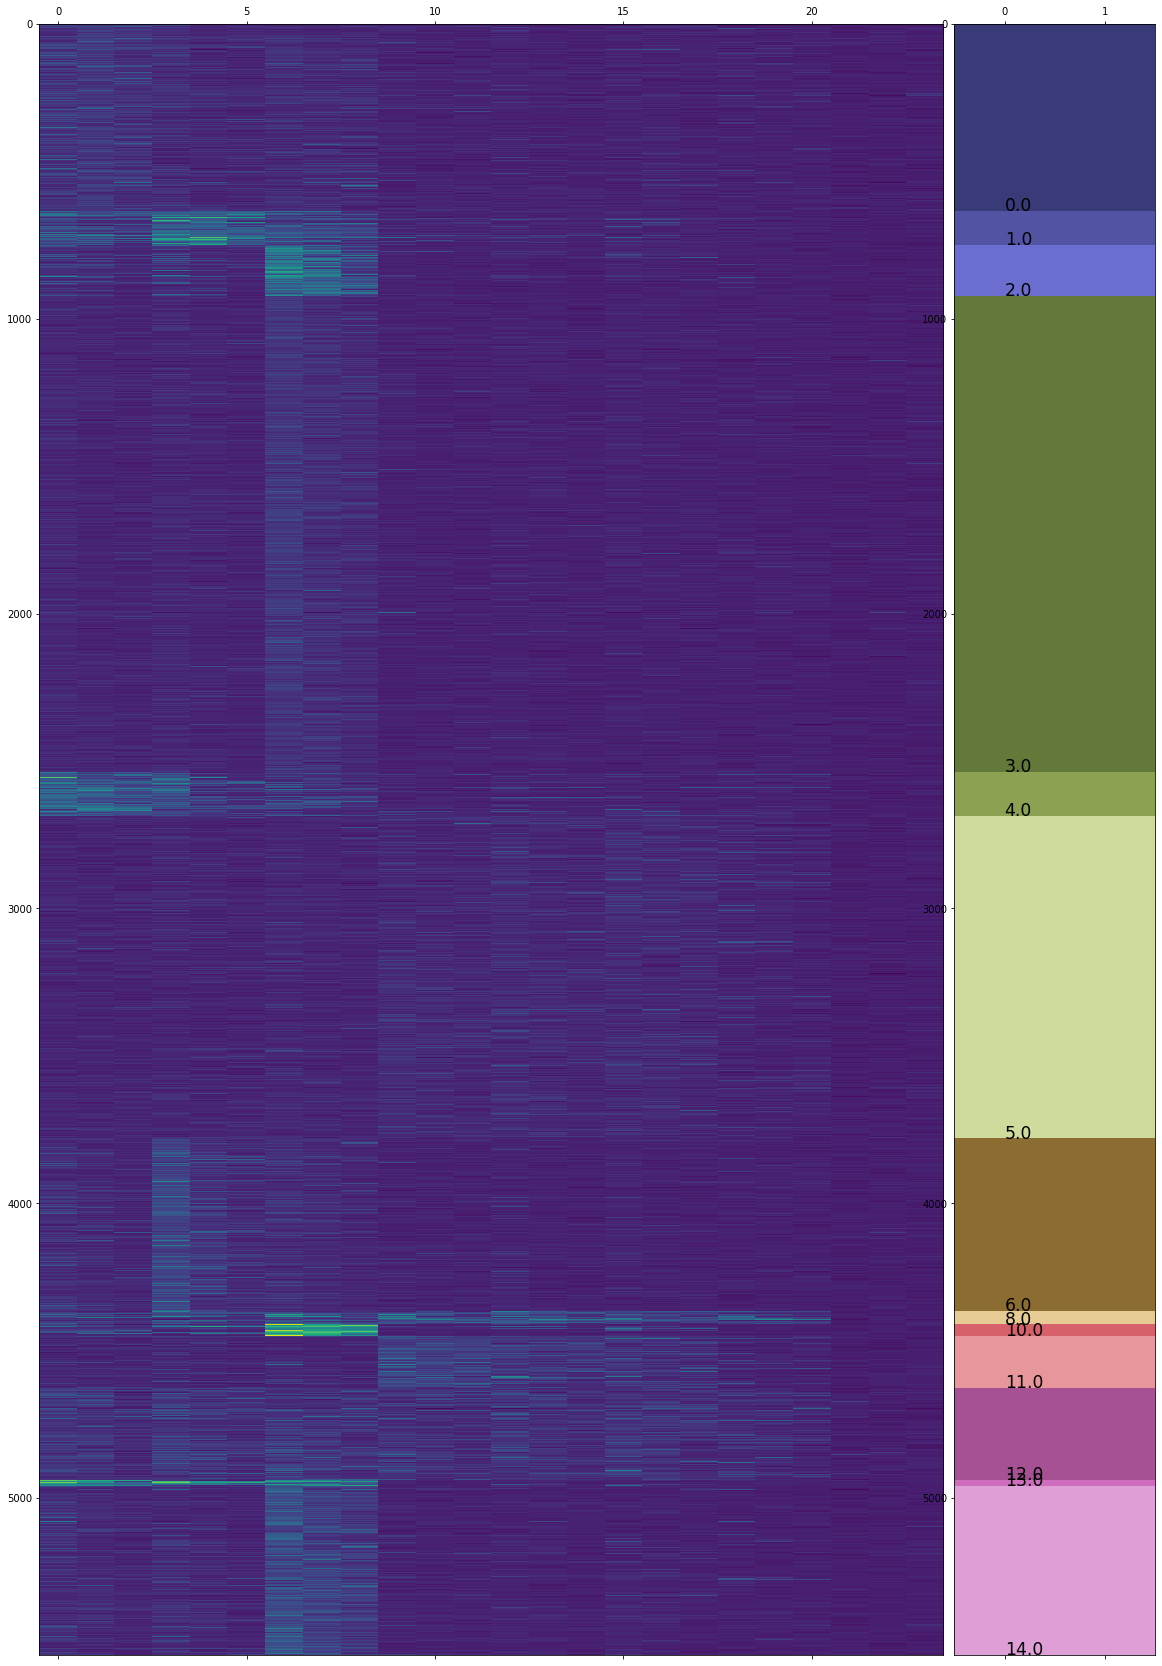

In [57]:
plot_clustered_heatmap(all_response, kmeans, exclude_cluster_id=[7,9])

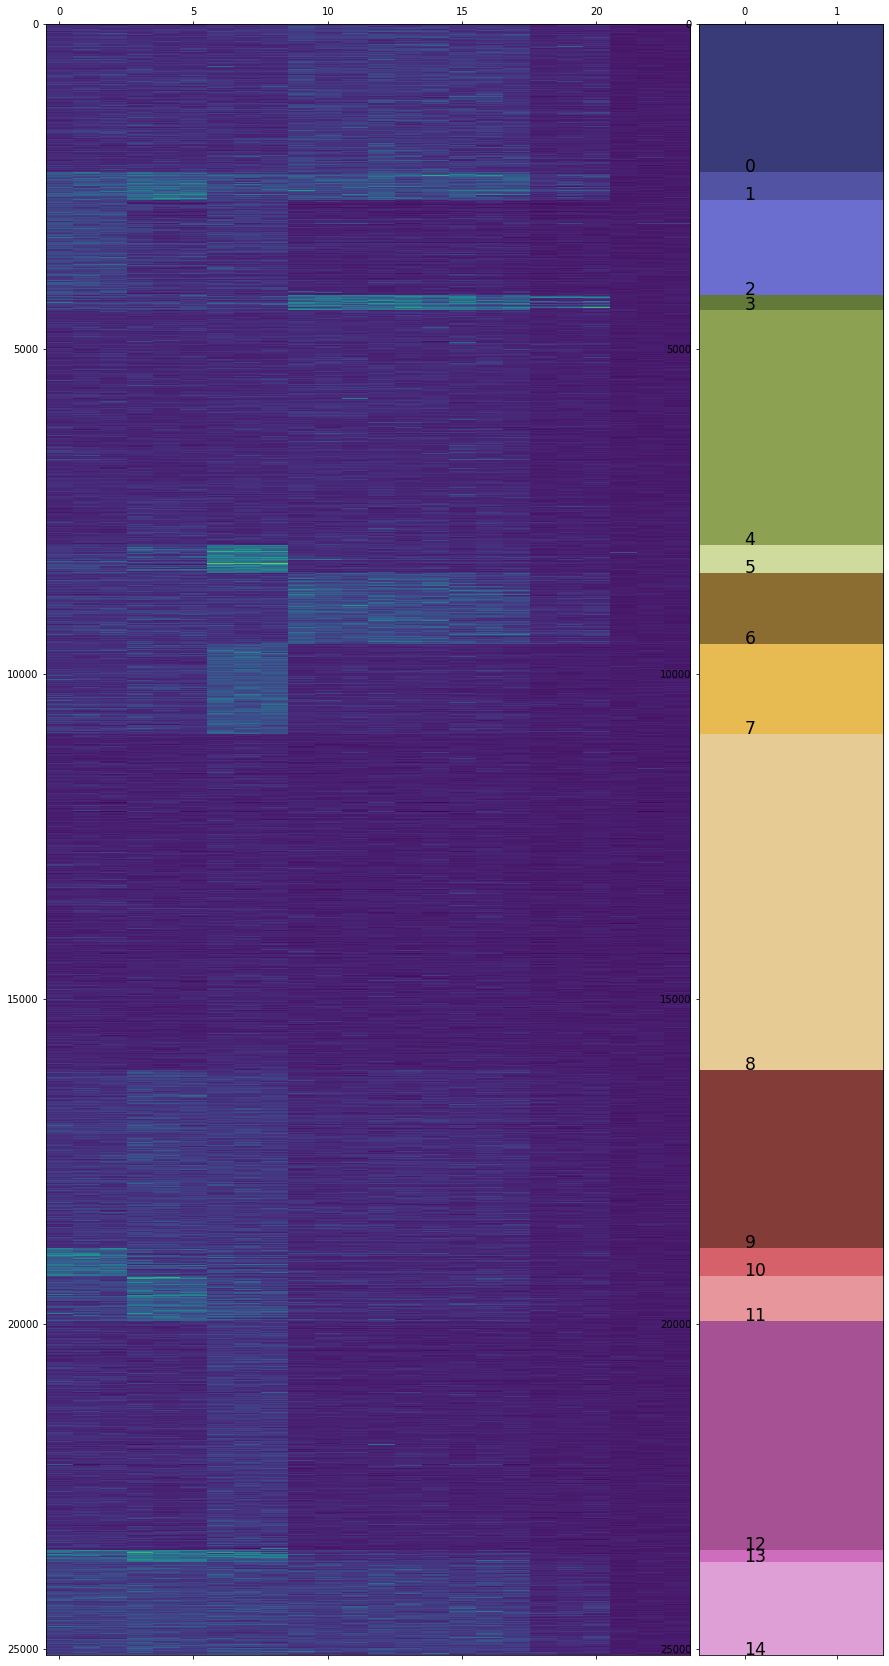

In [9]:
import matplotlib
fig = plt.figure(figsize=(15, 30))

gs = fig.add_gridspec(1, 2,  width_ratios=(7, 2), wspace=0.02)

ax = fig.add_subplot(gs[0, 0])
ax_cid = fig.add_subplot(gs[0, 1], sharey=ax)
idx = np.argsort(kmeans.labels_)
response_heatmap = ax.matshow(H.transpose()[idx,:], aspect='auto')

ori_cmap = matplotlib.cm.get_cmap('tab20b')
cnorm = matplotlib.colors.Normalize(vmin=0, vmax=n_clusters-1)
cmap = matplotlib.colors.ListedColormap([ori_cmap(cnorm(i)) for i in range(n_clusters)])
cluster_id_map = ax_cid.matshow(np.tile(kmeans.labels_[idx], (2,1)).transpose(),
                                aspect='auto', cmap=cmap)
# plt.colorbar(mappable=cluster_id_map)

labels, counts = np.unique(kmeans.labels_[idx], return_counts=True)
dummy = [ax_cid.text(0, ct, l, fontsize='xx-large') for ct, l in zip(np.cumsum(counts), labels)]

In [121]:
cluster_df = pd.DataFrame(kmeans.labels_.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
training_dict = dict(exp_list)
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_df

,fish_id,plane,neuron,cluster_id,train_cond
0,2021-02-05-DpOBEM-JH9,0,4,4,phe-arg
1,2021-02-05-DpOBEM-JH9,0,7,8,phe-arg
2,2021-02-05-DpOBEM-JH9,0,10,8,phe-arg
3,2021-02-05-DpOBEM-JH9,0,11,4,phe-arg
4,2021-02-05-DpOBEM-JH9,0,15,8,phe-arg
...,...,...,...,...,...
25085,2021-12-31-DpOBEM-N7,3,207,8,naive
25086,2021-12-31-DpOBEM-N7,3,208,8,naive
25087,2021-12-31-DpOBEM-N7,3,209,8,naive
25088,2021-12-31-DpOBEM-N7,3,210,8,naive


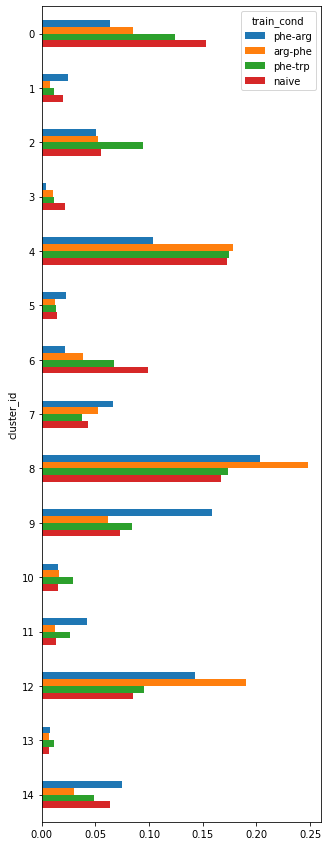

In [129]:
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
fig, ax = plt.subplots(figsize=(5,15))
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')
cluster_count_df.unstack(0).plot.barh(ax=ax)
ax.invert_yaxis()

In [29]:
def plot_cluster_count(all_response, kmeans, exp_list, exclude_cluster_id=[]):
    cluster_df = pd.DataFrame(kmeans.labels_.reshape(1,-1), columns=all_response.columns)
    cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
    training_dict = dict(exp_list)
    cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
    
    cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
    fig, ax = plt.subplots(figsize=(5,15))
    if len(exclude_cluster_id):
        cluster_df = cluster_df[~cluster_df['cluster_id'].isin(exclude_cluster_id)]
    grouped_cluster_id = cluster_df.groupby('train_cond', sort=False).cluster_id
    cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')
    cluster_count_df.unstack(0).plot.barh(ax=ax)
    ax.invert_yaxis()

In [59]:
region = 'Dp'
all_response = pd.read_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

In [60]:
kmeans = dict()

In [61]:
H = all_response.to_numpy()
n_clusters = 15
kmeans[region] = KMeans(n_clusters=n_clusters, random_state=0).fit(H.transpose())

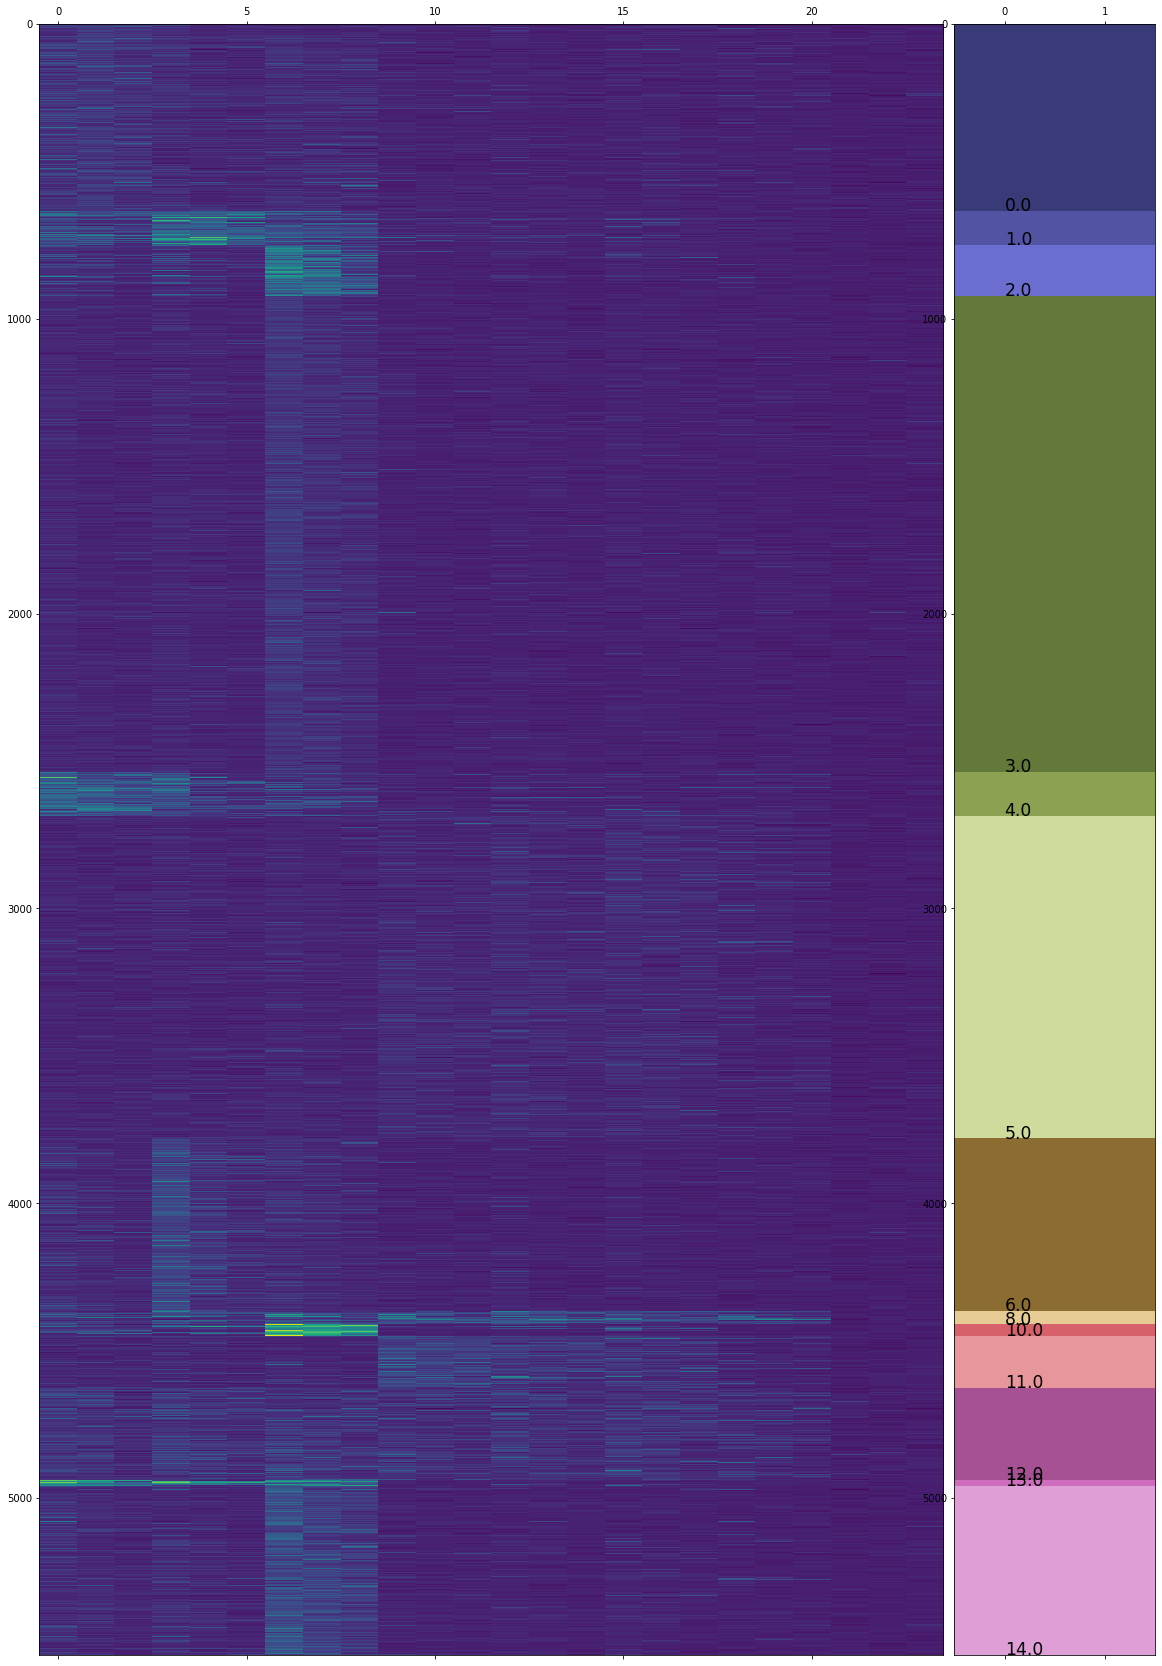

In [62]:
plot_clustered_heatmap(all_response, kmeans[region], exclude_cluster_id=[7,9])

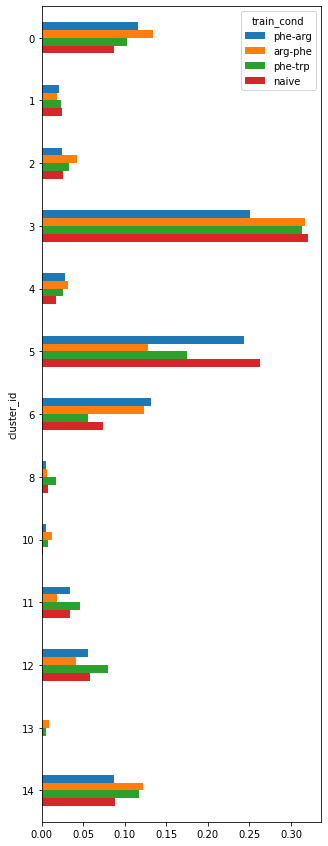

In [63]:
plot_cluster_count(all_response, kmeans[region], exp_list, exclude_cluster_id=[7, 9])

In [6]:
region = 'OB'
kmeans_dict = dict()
all_response = pd.read_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
H = all_response.to_numpy()
n_clusters = 15
kmeans_dict[region] = KMeans(n_clusters=n_clusters, random_state=0).fit(H.transpose())

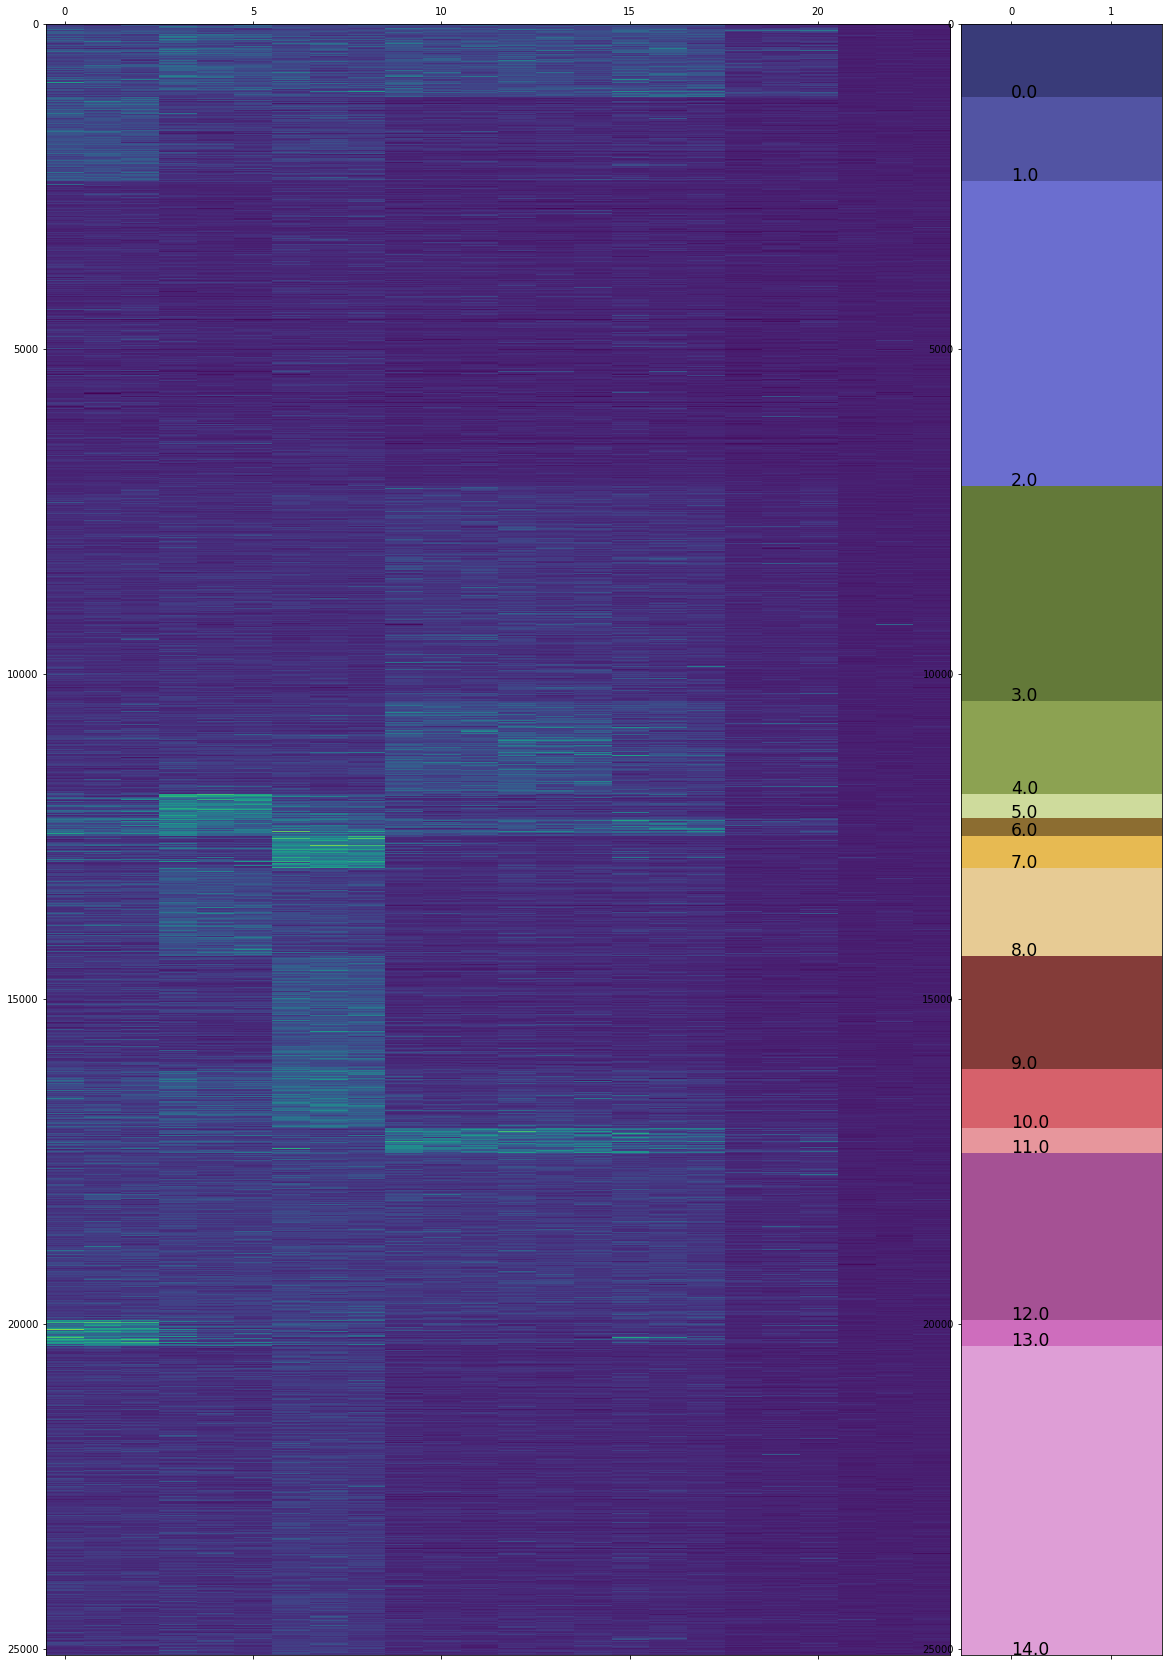

In [10]:
import catrace.cluster as catclust
catclust.plot_clustered_heatmap(all_response, kmeans_dict[region])#, exclude_cluster_id=[7,9])

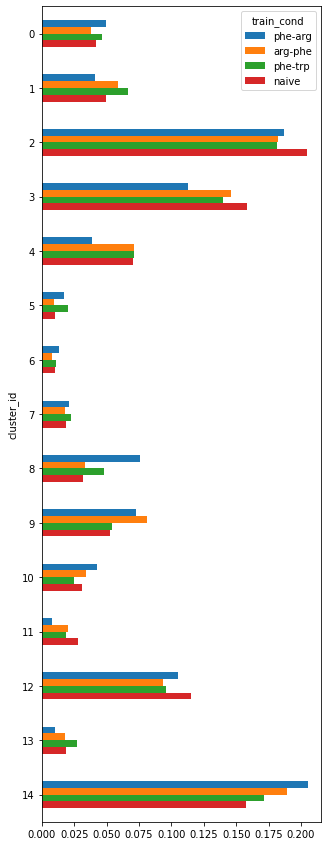

In [13]:
catclust.plot_cluster_count(all_response, kmeans_dict[region], exp_list)#, exclude_cluster_id=[7, 9])

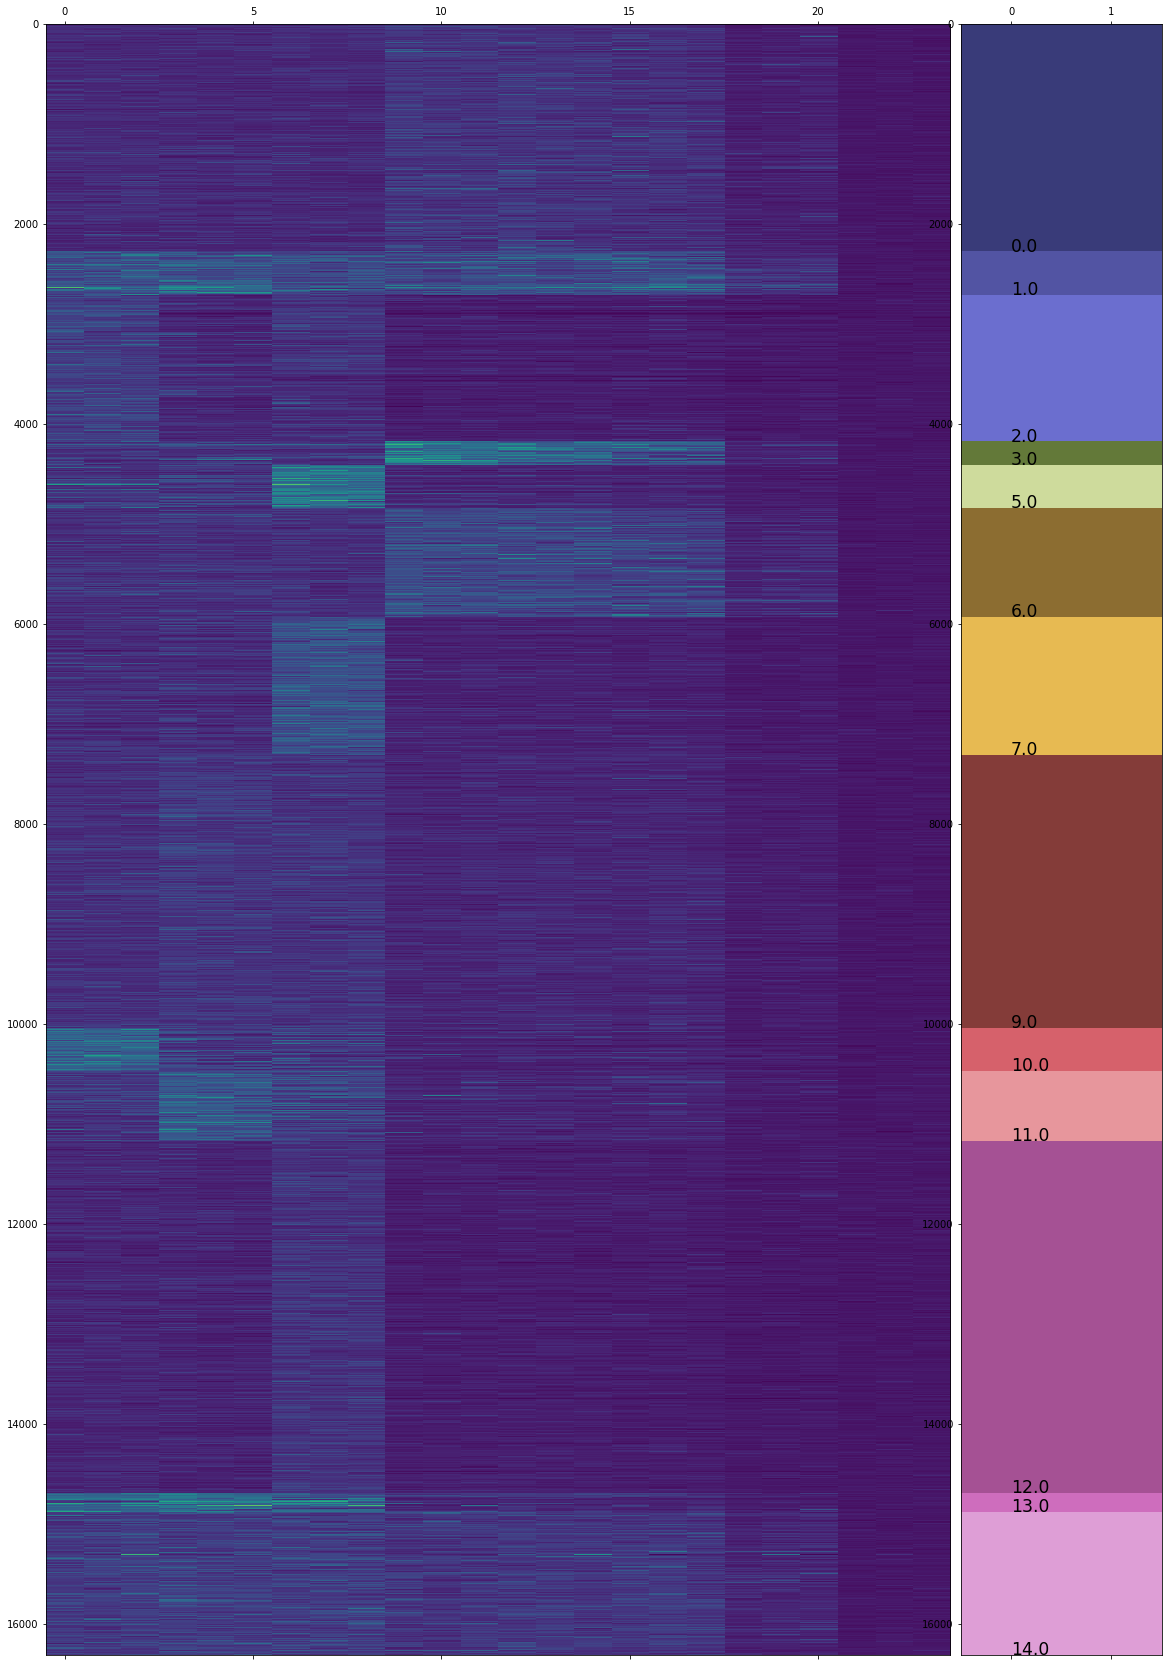

In [69]:
plot_clustered_heatmap(all_response, kmeans[region], exclude_cluster_id=[4,8])

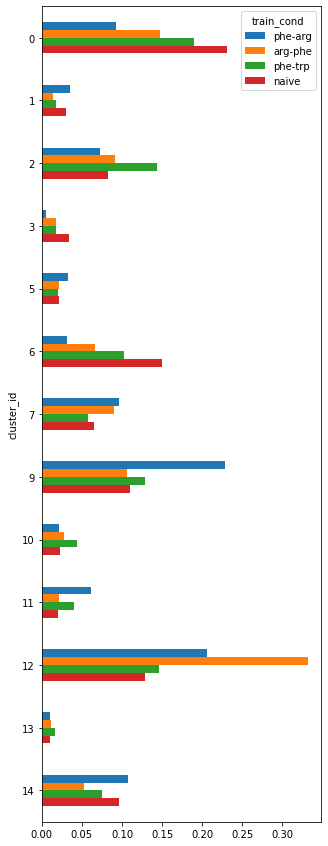

In [70]:
plot_cluster_count(all_response, kmeans[region], exp_list, exclude_cluster_id=[4,8])